In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#to display float values in 2 decimal places in panda
pd.options.display.float_format='{:,.2f}'.format

#to display float values in 2 decimal places in numpy
np.set_printoptions(precision=2)

# enabling interactivity of jupyther notebook,so can print multiple outputs in single cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Step 1: Import and explore the data.

In [14]:
data=pd.read_csv("signal-data.csv")
data1=data.copy(deep=True)

In [15]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,"3,030.93","2,564.00","2,187.73","1,411.13",1.36,100.00,97.61,0.12,1.50,...,nan,0.50,0.01,0.00,2.36,nan,nan,nan,nan,-1
1,2008-07-19 12:32:00,"3,095.78","2,465.14","2,230.42","1,463.66",0.83,100.00,102.34,0.12,1.50,...,208.20,0.50,0.02,0.01,4.44,0.01,0.02,0.01,208.20,-1
2,2008-07-19 13:17:00,"2,932.61","2,559.94","2,186.41","1,698.02",1.51,100.00,95.49,0.12,1.44,...,82.86,0.50,0.02,0.00,3.17,0.06,0.05,0.01,82.86,1
3,2008-07-19 14:43:00,"2,988.72","2,479.90","2,199.03",909.79,1.32,100.00,104.24,0.12,1.49,...,73.84,0.50,0.01,0.00,2.05,0.02,0.01,0.00,73.84,-1
4,2008-07-19 15:22:00,"3,032.24","2,502.87","2,233.37","1,326.52",1.53,100.00,100.40,0.12,1.50,...,nan,0.48,0.48,0.10,99.30,0.02,0.01,0.00,73.84,-1


In [4]:
data.dtypes.value_counts()

float64    590
int64        1
object       1
dtype: int64

Thus, we see that all features are numerical data. Also, they are moslty float(590) and only 1 integer feature.The Object datatype is a categorical variable for the Target variable.

In [5]:
data.size
data.shape

927664

(1567, 592)

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,"1,561.00","1,560.00","1,553.00","1,553.00","1,553.00","1,553.00","1,553.00","1,558.00","1,565.00","1,565.00",...,618.00,"1,566.00","1,566.00","1,566.00","1,566.00","1,566.00","1,566.00","1,566.00","1,566.00","1,567.00"
mean,"3,014.45","2,495.85","2,200.55","1,396.38",4.20,100.00,101.11,0.12,1.46,-0.00,...,97.93,0.50,0.02,0.00,3.07,0.02,0.02,0.01,99.67,-0.87
std,73.62,80.41,29.51,441.69,56.36,0.00,6.24,0.01,0.07,0.02,...,87.52,0.00,0.02,0.00,3.58,0.01,0.01,0.00,93.89,0.50
min,"2,743.24","2,158.75","2,060.66",0.00,0.68,100.00,82.13,0.00,1.19,-0.05,...,0.00,0.48,0.01,0.00,1.20,-0.02,0.00,0.00,0.00,-1.00
25%,"2,966.26","2,452.25","2,181.04","1,081.88",1.02,100.00,97.92,0.12,1.41,-0.01,...,46.18,0.50,0.01,0.00,2.31,0.01,0.01,0.00,44.37,-1.00
50%,"3,011.49","2,499.40","2,201.07","1,285.21",1.32,100.00,101.51,0.12,1.46,-0.00,...,72.29,0.50,0.01,0.00,2.76,0.02,0.01,0.00,71.90,-1.00
75%,"3,056.65","2,538.82","2,218.06","1,591.22",1.53,100.00,104.59,0.12,1.52,0.01,...,116.54,0.50,0.02,0.00,3.30,0.03,0.02,0.01,114.75,-1.00
max,"3,356.35","2,846.44","2,315.27","3,715.04","1,114.54",100.00,129.25,0.13,1.66,0.07,...,737.30,0.51,0.48,0.10,99.30,0.10,0.08,0.03,737.30,1.00


We see there are many missing values. Moslty, variables are normal distributed with some right and left skewed. Also, the variable are in different ranges, so we will have to scale the data.

# Step 2 : Data Cleanisng

In [7]:
np.array(data.isnull().sum())

array([   0,    6,    7,   14,   14,   14,   14,   14,    9,    2,    2,
          2,    2,    2,    3,    3,    3,    3,    3,    3,   10,    0,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          1,    1,    1,    1,    1,    1,    1,    1,   24,   24,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    4,
          4,    4,    4,    4,    4,    7,    6,    6,    6,    7,    7,
          7,    6,    6,    6,    6,    6,    6,  794,  794,    6,   24,
         24,   24,   24,   24,   24,   24,   24,    1,   12, 1341,    0,
          0,    0,   51,   51,    6,    2,    2,    6,    6,    6,    6,
          6,    6,    6,    6,    6,    2,    2,    6,    6,    6,    6,
       1018, 1018, 1018,  715,    0,    0,    0,    0,    0,   24,    0,
          0,    9,    9,    9,    9,    9,    9,    9,    9,    9,    9,
          9,    8,    8,    8,    5,    6,    7,   14,   14,   14,   14,
         14,    9,    2,    2,    2,    2,    2,   

In [8]:
data.isnull().sum().sum()

41951

# Step 2.1 : Drop attributes using functional knowledge/reason/assumptions.

### 1) Dropping columns having more than 50% data missing.  

In [16]:
nulldata=pd.DataFrame(data.isnull().sum(),columns=['nullval'])
nulldata[nulldata['nullval']>700].count()

nullval    32
dtype: int64

### So,we see that there are 32 columns who have more than 700 rows having missing values. We will now  drop these columns.

In [17]:
deCol=[]
count=0
for num in nulldata[nulldata['nullval']>=700].index:
    data.drop([num],axis=1,inplace=True)
    deCol.append(num)
    count=count+1
print("total rows dropped because of missing values as nan is:",count)
#print(deCol)

total rows dropped because of missing values as nan is: 32


In [18]:
data.shape

(1567, 560)

In [19]:
# dropping the Time column since it has no predictvie value
data.drop(['Time'],axis=1,inplace=True)

In [20]:
data.shape

(1567, 559)

# Step 2.2  Data cleansing - Missing value treatment

Creating a for loop for every feature in dataset. Filling in the missing values with column median values.

In [21]:
for feature in data.columns:
    data[feature].fillna(0,inplace=True)    
    data[feature].replace(0,data[feature].median(),inplace=True)

### Step 2: Dropping Attributes
### 2)Finding columns with  Standard Deviation is = 0  (No Variance in data) and dropping those columns.

In [22]:
count=0
for feature in data.columns:
    if data[feature].std()==0:
        #print(feature)
        data.drop([feature],axis=1,inplace=True)
        deCol.append(feature)
        count=count+1
        
print("No. of columns whose standard deviation was 0 and hence dropped:",count)

No. of columns whose standard deviation was 0 and hence dropped: 116


In [12]:
data.shape

(1567, 443)

### 3) Dropping columns based on Coefficient of Variation

* Still, we find many columns having a low variance. Such columns are not good predictors for the Target columns.
* Hence, we calculate Coefficient of Variation for each column in the dataset.
* Generally, a CV >= 1 indicates a relatively high variation, while a CV < 1 can be considered low. This means that distributions with a coefficient of variation higher than 1 are considered to be high variance (We will retain these columns) whereas those with a CV lower than 1 are considered to be low-variance.(We will drop these columns)

### So,we will drop the columns whose coefficient of variation is <1

In [23]:
import scipy.stats
count=0
for feature in data.columns[:-1]:
    p=scipy.stats.variation(data[feature], axis = 0)
    if p<=1:
        #print(feature)
        data.drop([feature],axis=1,inplace=True)
        deCol.append(feature)
        count=count+1
        
print("No. of columns whose variance was <1 and hence dropped: ",count)


No. of columns whose variance was <1 and hence dropped:  338


In [24]:
data.shape

(1567, 105)

In [25]:
#columns which were dropped, can be examined later i a different excel.
data1[deCol].shape
deldf=pd.DataFrame(data1[deCol])
deldf.to_excel('deldf.xlsx',index=True,sheet_name='first sheet')


(1567, 486)

In [26]:
# The 105 columns we are now left with:
data.columns

Index(['4', '10', '59', '67', '74', '79', '82', '91', '92', '95',
       ...
       '549', '551', '554', '557', '572', '574', '576', '583', '585',
       'Pass/Fail'],
      dtype='object', length=105)

# Step 3: Data Analysis and Visualization

## Univariate Analysis

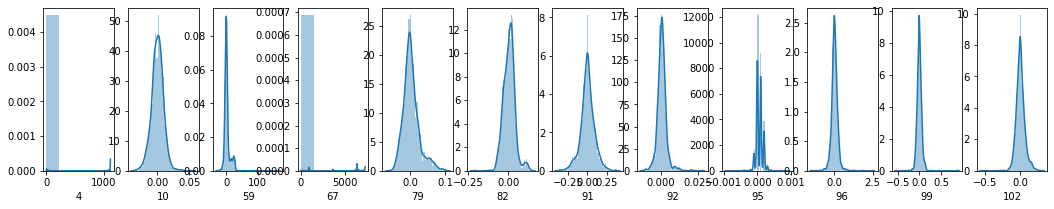

In [28]:
fig,ax=plt.subplots(1,12,figsize=(18,3))
sns.distplot(data['4'],bins=5,ax=ax[0]);
sns.distplot(data['10'],ax=ax[1]);
sns.distplot(data['59'],ax=ax[2]);
sns.distplot(data['67'],bins=5,ax=ax[3]);
sns.distplot(data['79'],ax=ax[4]);
sns.distplot(data['82'],ax=ax[5]);
sns.distplot(data['91'],ax=ax[6]);
sns.distplot(data['92'],ax=ax[7]);
sns.distplot(data['95'],ax=ax[8]);
sns.distplot(data['96'],ax=ax[9]);
sns.distplot(data['99'],ax=ax[10]);
sns.distplot(data['102'],ax=ax[11]);

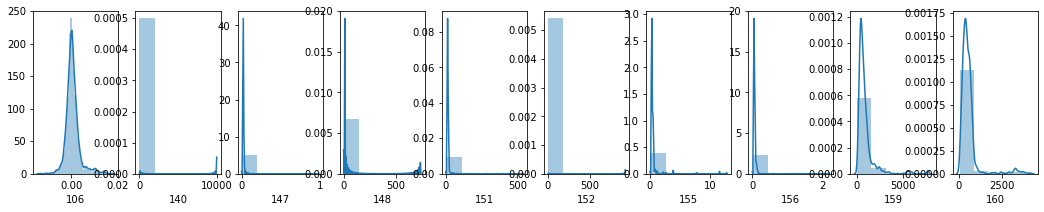

In [29]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['106'],ax=ax[0]);
sns.distplot(data['140'],bins=5,ax=ax[1]);
sns.distplot(data['147'],bins=5,ax=ax[2]);
sns.distplot(data['148'],bins=5,ax=ax[3]);
sns.distplot(data['151'],bins=5,ax=ax[4]);
sns.distplot(data['152'],bins=5,ax=ax[5]);
sns.distplot(data['155'],bins=5,ax=ax[6]);
sns.distplot(data['156'],bins=5,ax=ax[7]);
sns.distplot(data['159'],bins=5,ax=ax[8]);
sns.distplot(data['160'],bins=5,ax=ax[9]);


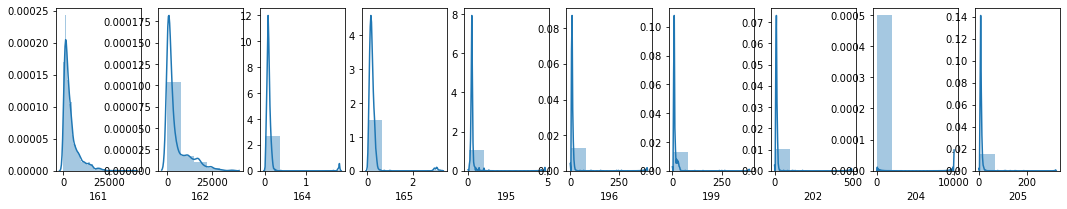

In [30]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['161'],ax=ax[0]);
sns.distplot(data['162'],bins=5,ax=ax[1]);
sns.distplot(data['164'],bins=5,ax=ax[2]);
sns.distplot(data['165'],bins=5,ax=ax[3]);
sns.distplot(data['195'],bins=5,ax=ax[4]);
sns.distplot(data['196'],bins=5,ax=ax[5]);
sns.distplot(data['199'],bins=5,ax=ax[6]);
sns.distplot(data['202'],bins=5,ax=ax[7]);
sns.distplot(data['204'],bins=5,ax=ax[8]);
sns.distplot(data['205'],bins=5,ax=ax[9]);

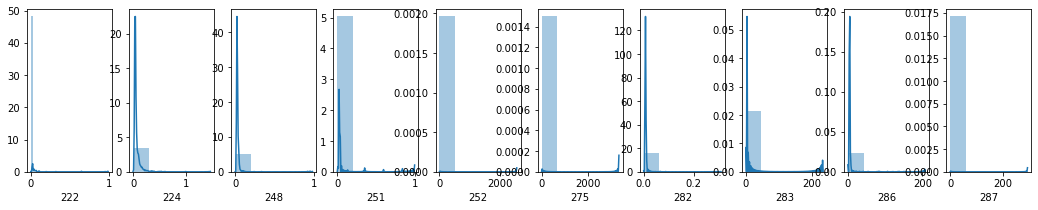

In [31]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['222'],ax=ax[0]);
sns.distplot(data['224'],bins=5,ax=ax[1]);
sns.distplot(data['248'],bins=5,ax=ax[2]);
sns.distplot(data['251'],bins=5,ax=ax[3]);
sns.distplot(data['252'],bins=5,ax=ax[4]);
sns.distplot(data['275'],bins=5,ax=ax[5]);
sns.distplot(data['282'],bins=5,ax=ax[6]);
sns.distplot(data['283'],bins=5,ax=ax[7]);
sns.distplot(data['286'],bins=5,ax=ax[8]);
sns.distplot(data['287'],bins=5,ax=ax[9]);

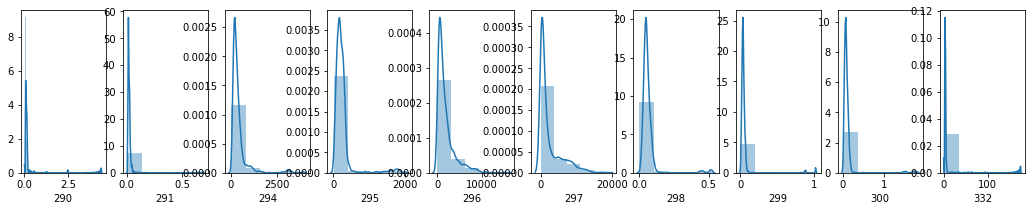

In [32]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['290'],ax=ax[0]);
sns.distplot(data['291'],bins=5,ax=ax[1]);
sns.distplot(data['294'],bins=5,ax=ax[2]);
sns.distplot(data['295'],bins=5,ax=ax[3]);
sns.distplot(data['296'],bins=5,ax=ax[4]);
sns.distplot(data['297'],bins=5,ax=ax[5]);
sns.distplot(data['298'],bins=5,ax=ax[6]);
sns.distplot(data['299'],bins=5,ax=ax[7]);
sns.distplot(data['300'],bins=5,ax=ax[8]);
sns.distplot(data['332'],bins=5,ax=ax[9]);

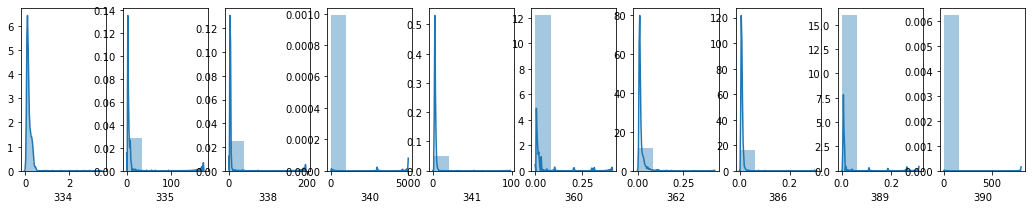

In [33]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['334'],ax=ax[0]);
sns.distplot(data['335'],bins=5,ax=ax[1]);
sns.distplot(data['338'],bins=5,ax=ax[2]);
sns.distplot(data['340'],bins=5,ax=ax[3]);
sns.distplot(data['341'],bins=5,ax=ax[4]);
sns.distplot(data['360'],bins=5,ax=ax[5]);
sns.distplot(data['362'],bins=5,ax=ax[6]);
sns.distplot(data['386'],bins=5,ax=ax[7]);
sns.distplot(data['389'],bins=5,ax=ax[8]);
sns.distplot(data['390'],bins=5,ax=ax[9]);

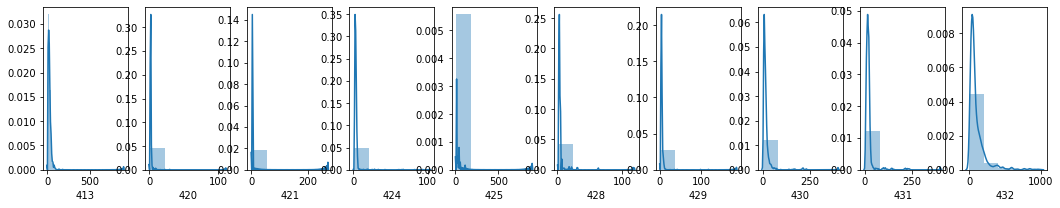

In [34]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['413'],ax=ax[0]);
sns.distplot(data['420'],bins=5,ax=ax[1]);
sns.distplot(data['421'],bins=5,ax=ax[2]);
sns.distplot(data['424'],bins=5,ax=ax[3]);
sns.distplot(data['425'],bins=5,ax=ax[4]);
sns.distplot(data['428'],bins=5,ax=ax[5]);
sns.distplot(data['429'],bins=5,ax=ax[6]);
sns.distplot(data['430'],bins=5,ax=ax[7]);
sns.distplot(data['431'],bins=5,ax=ax[8]);
sns.distplot(data['432'],bins=5,ax=ax[9]);

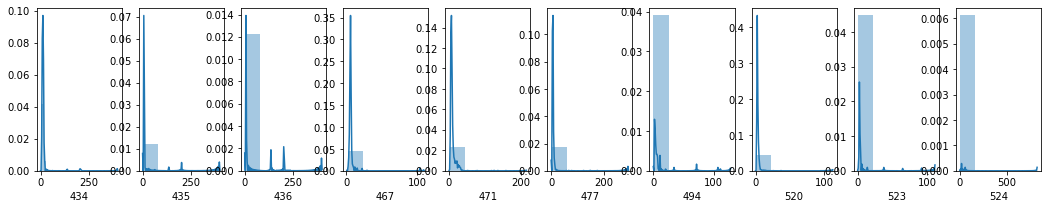

In [35]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(data['434'],ax=ax[0]);
sns.distplot(data['435'],bins=5,ax=ax[1]);
sns.distplot(data['436'],bins=5,ax=ax[2]);
sns.distplot(data['467'],bins=5,ax=ax[3]);
sns.distplot(data['471'],bins=5,ax=ax[4]);
sns.distplot(data['477'],bins=5,ax=ax[5]);
sns.distplot(data['494'],bins=5,ax=ax[6]);
sns.distplot(data['520'],bins=5,ax=ax[7]);
sns.distplot(data['523'],bins=5,ax=ax[8]);
sns.distplot(data['524'],bins=5,ax=ax[9]);

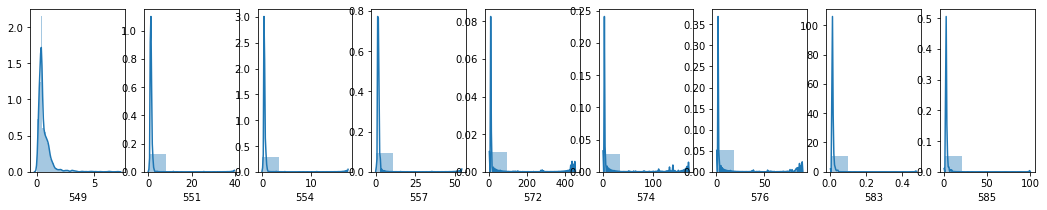

In [36]:
fig,ax=plt.subplots(1,9,figsize=(18,3))
sns.distplot(data['549'],ax=ax[0]);
sns.distplot(data['551'],bins=5,ax=ax[1]);
sns.distplot(data['554'],bins=5,ax=ax[2]);
sns.distplot(data['557'],bins=5,ax=ax[3]);
sns.distplot(data['572'],bins=5,ax=ax[4]);
sns.distplot(data['574'],bins=5,ax=ax[5]);
sns.distplot(data['576'],bins=5,ax=ax[6]);
sns.distplot(data['583'],bins=5,ax=ax[7]);
sns.distplot(data['585'],bins=5,ax=ax[8]);

* We see mostly the variables are normally distributed. However, there are some left skewed and right skewed distribuiton also.

## Bivariate Analysis

### Pairplot

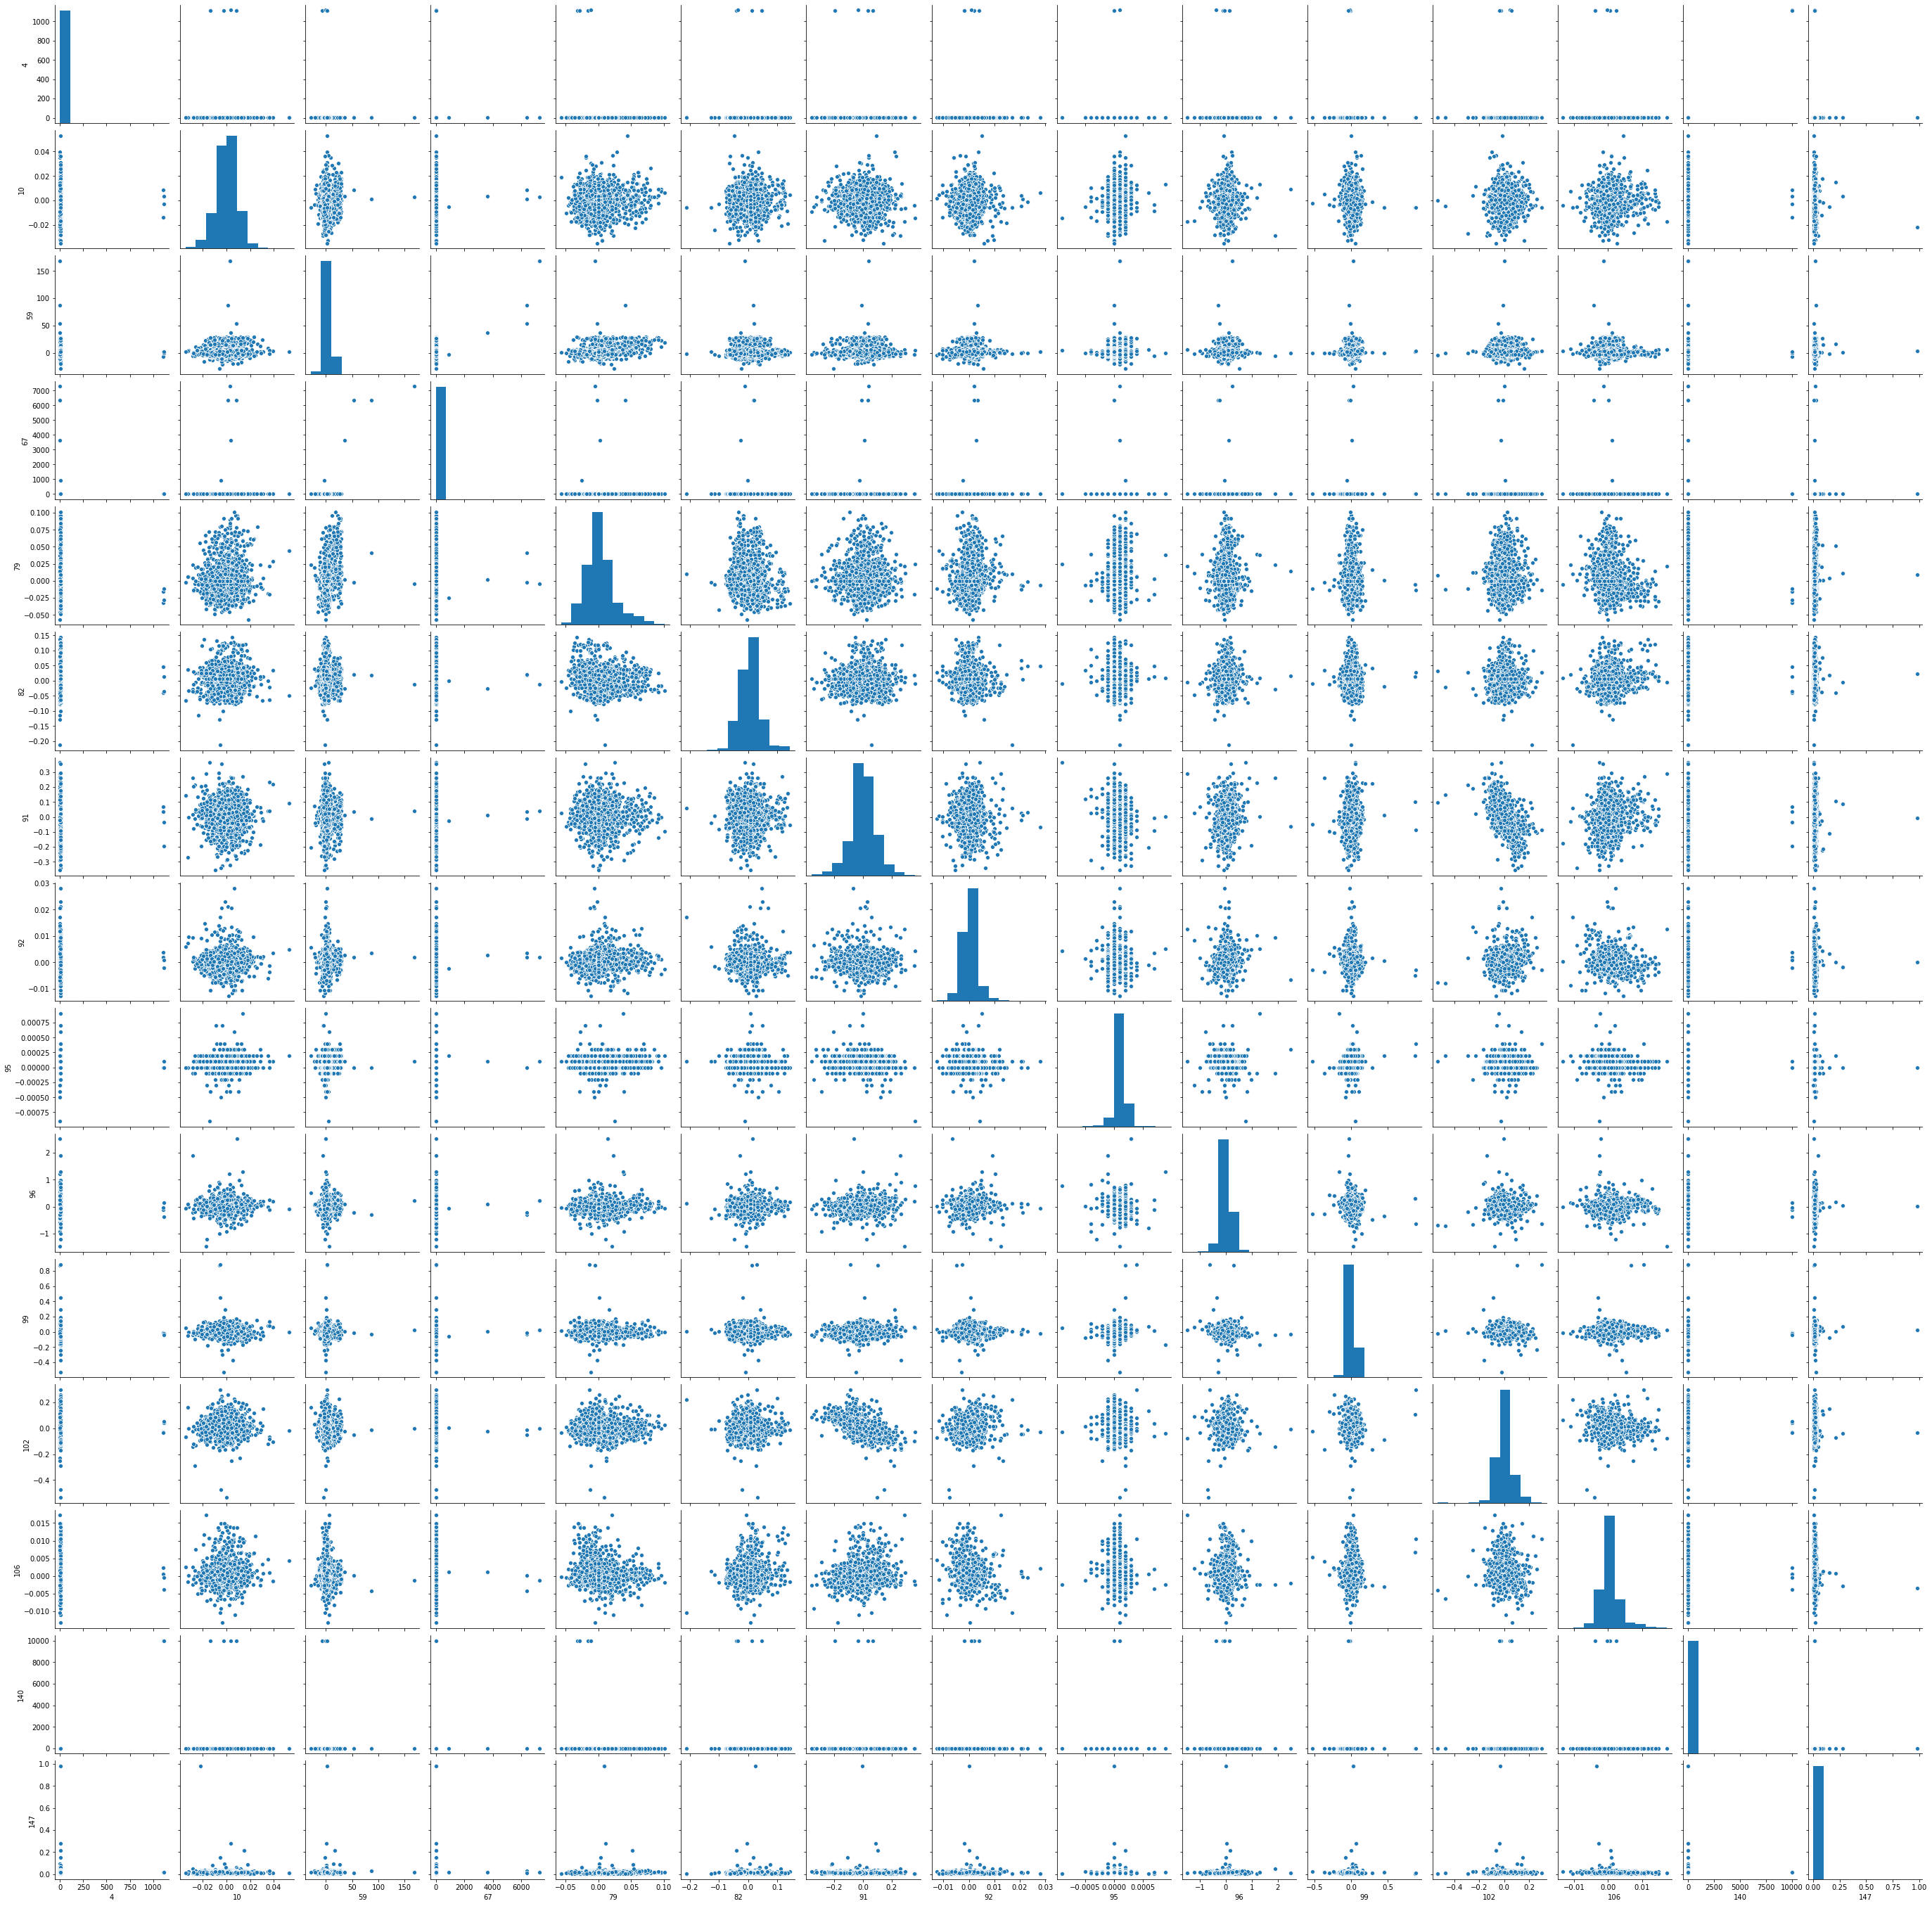

In [147]:
sns.pairplot(data.iloc[:,0:15]);

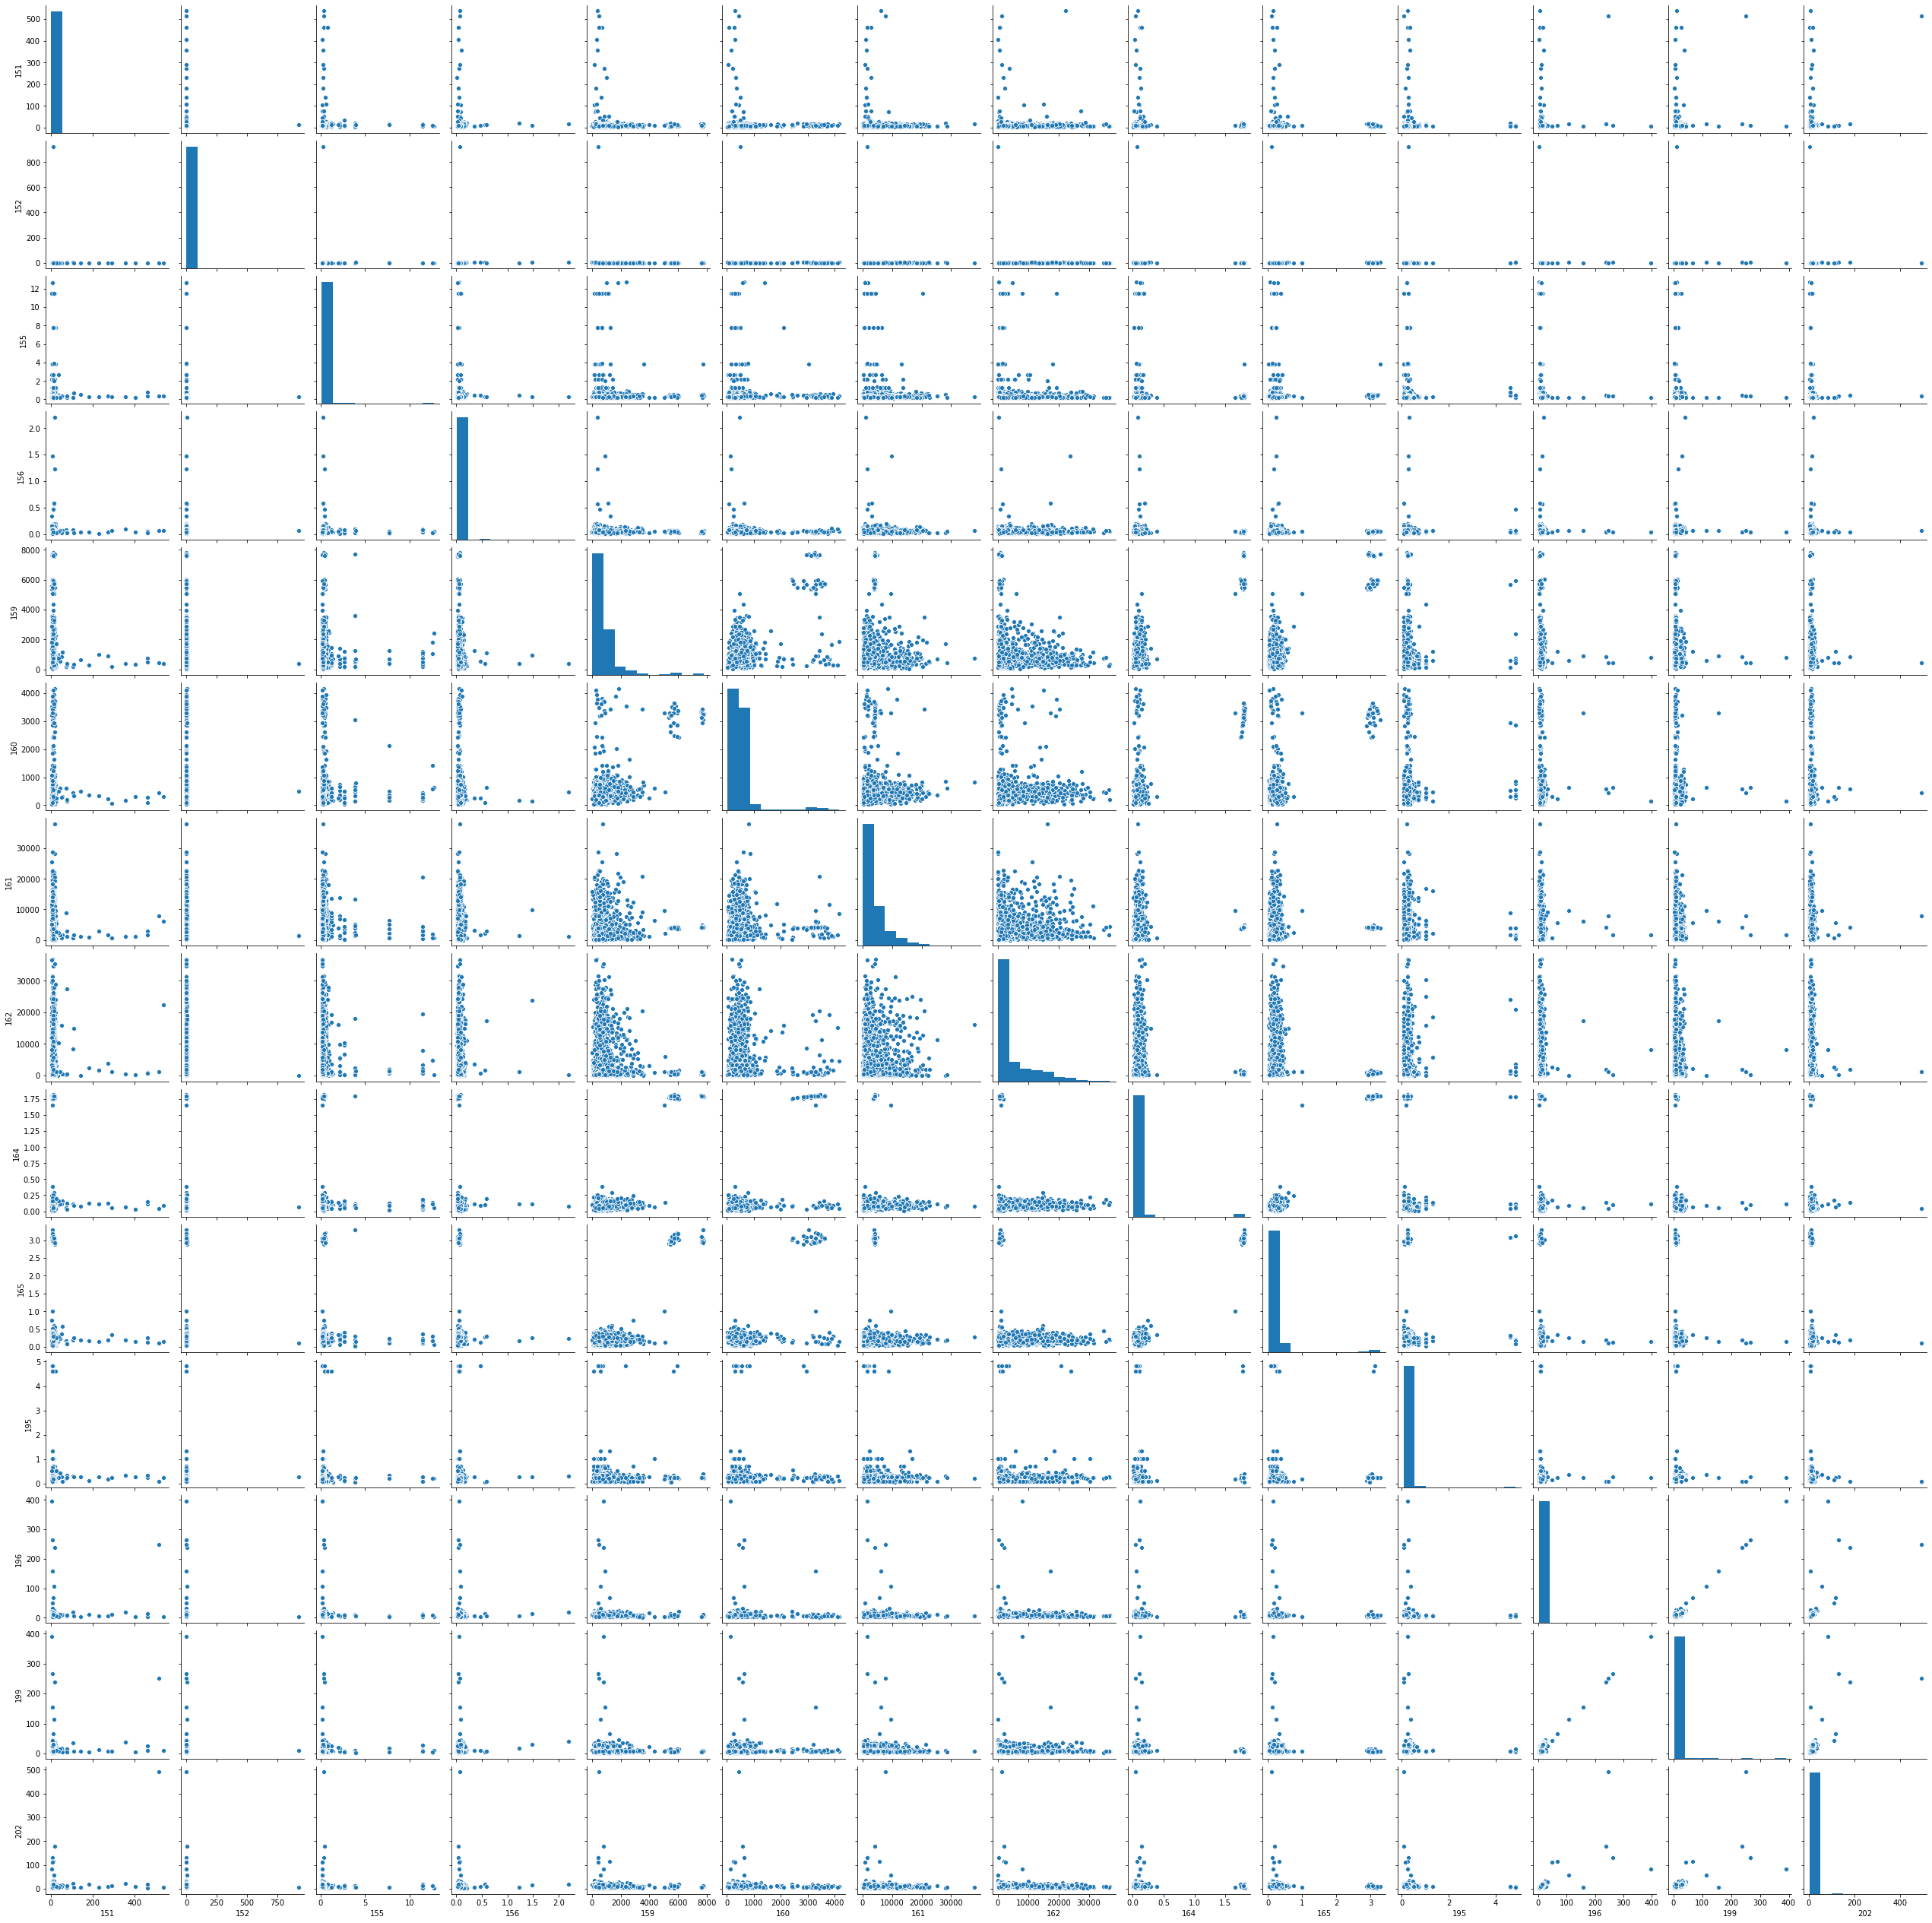

In [148]:
sns.pairplot(data.iloc[:,16:30]);

* We see some corrleation between few of the input features. We will handle this by doing PCA and removing multi-collinearity

# Heatmap

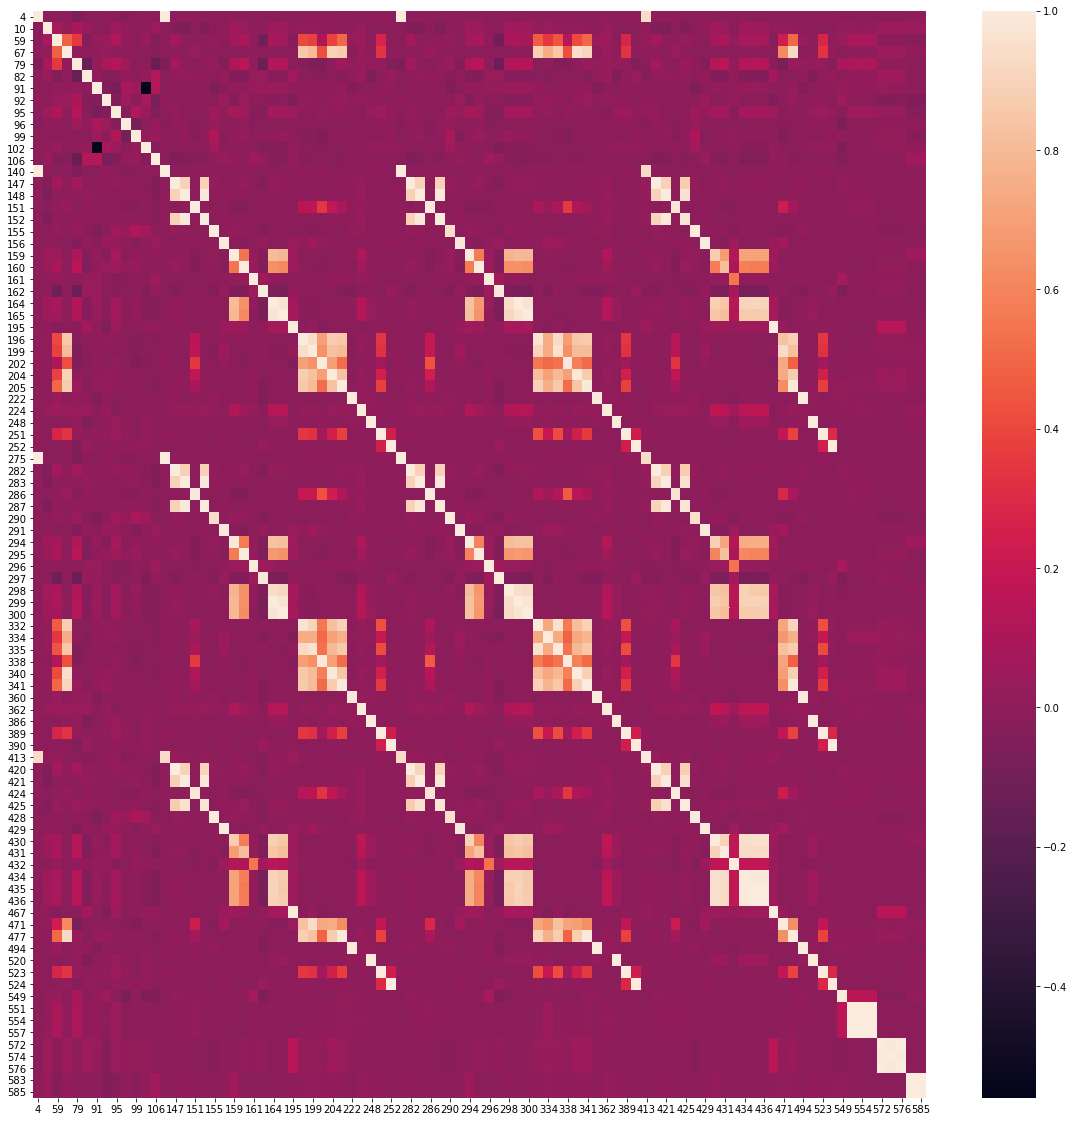

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=False);

* Based on the colour patterns, we see there is definitively high correlation between some features. We will consider doing PCA which will handle this multi-collinearity issue and also reduce the numbers of dimensions.

In [ ]:
# to evaluate correlation coeffients more deeply, we can load it into an excel sheet and analyze
d_corr=pd.DataFrame(data.corr())
d_corr.to_excel('d_corr.xlsx',index=True,sheet_name='first sheet')

# Target Feature Univariate Analysis 

In [20]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

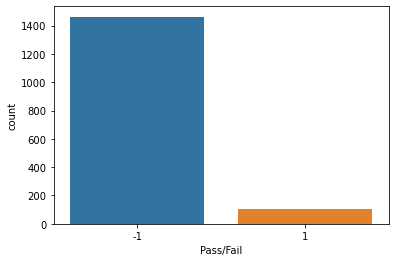

In [21]:
sns.countplot(data['Pass/Fail']);

* There is certainly a class imbalance where class 1 is under represented.
* We will consider doing upsampling or downsampling to handle this.

# Handling Outliers

In [27]:
from scipy.stats import zscore
for feature in data.columns[:-1]:
    data['zscore']=zscore(data[feature])
    data[feature].replace((data[data['zscore'].abs()>=2].index),data[feature].median(),inplace=True)
    data.drop(['zscore'],axis=1,inplace=True)

We calculate zscore for all datapoints in each feature. All values whose zscore > 2, we treat them as outliers and replace them with column median. 

# Step 4: Data Pre-Processing

# Step 4.1 : Segregate predictors vs target attributes

In [28]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [29]:
#x

# Step 4.3 : Perform Train-Test split and standardize the data

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify = y, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

We have scaled the features with Standard scaler. When the .fit() function is applied on the train data, the mean and standard deviation of train data is calculated. Using this mean and std dev., both the train and test data are scaled.

In [181]:
#x_train

# Step 4.2 : Check for target balancing and fix if found imbalanced 

In [32]:
y_train.value_counts()

-1    1097
 1      78
Name: Pass/Fail, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [34]:
y_train.value_counts()

 1    1097
-1    1097
Name: Pass/Fail, dtype: int64

* Thus, we see that oversampling with smote has generated synthetic data points for the minority class. Now both the classes are perfectly balanced. 

# Step 4.4 : Check if the train and test data have similar statistical characteristics when compared with original data.

Covariate refers to the predictor variables in our model. Covariate shift refers to a situation where predictor variables have different characteristics (distribution) in train and test data and hence they do not share similar statisitcal characterstics.

If there exist a covariate shift(i.e. train and test data do not have similar statistical characteristics when compared with original data), then upon mixing train and test we’ll still be able to classify the origin of each data point (whether it is from test or train) with good accuracy.

### Add a feature ‘is_train’ in both train and test data. Value for this feature will be 0 for test and 1 for train.

In [26]:
DX_train=pd.DataFrame(x_train)
DX_train['is_train']=1
DX_test=pd.DataFrame(x_test)
DX_test['is_train']=0

#DX_test

### Now combining both DX_train and DX_test, we get a new dataset df_combine

In [27]:
df_combine = pd.concat([DX_train,DX_test], axis=0, ignore_index=True)
#df_combine

In [28]:
y = df_combine['is_train'].values #labels
x = df_combine.drop('is_train', axis=1).values #covariates or our independent variables

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify = y, random_state=1)

### Train a Random Forest classifier and get the accuracy on test data.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 40, random_state=10)
rfc = rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

rfc.score(X_train , y_train)
rfc.score(X_test , y_test)

0.9986326344576116

0.7240437158469946

In [30]:
probas_ = rfc.predict_proba(X_test)
#probas_

If the classifier is able to classify the rows into train and test with good accuracy, our AUC score should be on the higher side (greater than 0.8). This implies strong covariate shift between train and test.

In [31]:
# Compute ROC curve and area the curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds1 = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.476913


### AUC value of 0.47 implies that there is no evidence of strong covariate shift. This means that majority of the observations comes from a feature space which is not specific to test or train. Thus, we can conclude that train and test data have similar statistical characteristics as of the original data.

# Step 5 : Model training, testing and tuning:

## Step 5.1.1 : Pick up a supervised learning model.

### The first supervised learning model that we will use is Decision Tree because it requires little or no preprocessing like Scaling, Outliers or Missing value treatment.

In [35]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=101) #can use criterion = 'entropy' also.

## Step 5.1.2 : Train the model.

In [36]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [37]:
dTree.score(x_train,y_train)
dTree.score(x_test,y_test)

1.0

0.8341836734693877

#### The above scores show a case of Overfit model. Decision Trees are prone to overfitting if no regularization is done. We will tune hyperparameters to regularize the tree.

## Step 5.1.3 : Use Cross Validation Techniques

### K-fold Cross Validation

In [36]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=77)
results = cross_val_score(dTree,x_train,y_train, cv=kfold)
results

np.mean(abs(results))
results.std()

array([0.85, 0.86, 0.84, 0.89, 0.8 , 0.91, 0.96, 0.93, 0.93, 0.94])

0.8915774180157742

0.04917165119278929

#### Testing Accuracy after cross validation (89%) is nearly same as the test accuracy we got earlier(84%). Standard Deviation is also less. Thus, we can say that this model will perform between 79% (0.89-2 * 0.05) and 99% (0.89+2 * 0.05) in 95% confidence interval.

### LOOCV

In [296]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

scores = cross_val_score(dTree,x_train,y_train, cv=LeaveOneOut())
scores.mean()
scores.std()

0.9156791248860529

0.27786843133750416

#### Testing Accuracy after LOOCV  is 91% . Standard Deviation is very high. Sample Standard Deviation is always much  higher in LOOCV than k-fold Cross validation).Thus, the range of performance will also be very high for LOOCV.

## Step 5.1.4 : Apply hyper-parameter tuning techniques to get the best accuracy. 

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5,6]}
grid = GridSearchCV(dTree, param_grid,cv=10)  
%time grid.fit(x_train, y_train)
print(grid.best_params_)
dTreebest = grid.best_estimator_
y_predict_Grid = dTreebest.predict(x_test)

CPU times: user 3min 39s, sys: 1.7 s, total: 3min 41s
Wall time: 3min 41s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
dTreebest.score(x_train,y_train)
dTreebest.score(x_test,y_test)

0.9658158614402917

0.798469387755102

#### Before Regularizing, Train/ Test score was 100% - 84%. The model was overfit  with a High Variance. Post Regulrizing, we did trade-off between Bias and Variance to get Train/ Test score at 97% - 82%. Variance has reduced by small amount but Bias has increased a bit.

In [40]:
from sklearn.metrics import  classification_report

print(classification_report(y_test, y_predict_Grid, digits=2))

              precision    recall  f1-score   support

          -1       0.95      0.83      0.89       366
           1       0.13      0.35      0.19        26

    accuracy                           0.80       392
   macro avg       0.54      0.59      0.54       392
weighted avg       0.89      0.80      0.84       392



## Step 5.1.5 : Use other technique to enhance the model performance.

### We have 93 columns which have some collinearity between them. Hence we will use PCA for Dimensionality Reduction. PCA will help us in numerous ways here- 1) Reduce Dimensions 2) Handle Multicollinearity 3) Make visualizations easier.

In [41]:
from sklearn.decomposition import PCA

pca = PCA()    
pca.fit(x_train)

#print("Eigen Values are\n",pca.explained_variance_)
#print("\nEigen Vectors are \n",pca.components_)
print("\nPercentage of variation explained by each eigen Vector\n",pca.explained_variance_ratio_)
print("\n Cumulative Variance Explained\n",np.cumsum(pca.explained_variance_ratio_))

PCA()


Percentage of variation explained by each eigen Vector
 [2.58e-01 1.36e-01 4.33e-02 4.11e-02 3.68e-02 3.61e-02 3.09e-02 2.61e-02
 2.47e-02 2.32e-02 2.12e-02 2.06e-02 1.99e-02 1.85e-02 1.77e-02 1.72e-02
 1.62e-02 1.57e-02 1.49e-02 1.41e-02 1.29e-02 1.25e-02 1.12e-02 9.91e-03
 8.98e-03 8.78e-03 8.53e-03 7.71e-03 7.59e-03 7.16e-03 7.04e-03 6.57e-03
 6.31e-03 5.91e-03 5.74e-03 5.21e-03 4.98e-03 4.79e-03 3.94e-03 3.49e-03
 3.08e-03 2.85e-03 2.50e-03 2.41e-03 1.82e-03 1.10e-03 7.48e-04 6.25e-04
 3.39e-04 3.32e-04 3.09e-04 2.73e-04 2.59e-04 2.45e-04 2.17e-04 1.90e-04
 1.04e-04 9.24e-05 8.52e-05 7.77e-05 7.15e-05 5.22e-05 4.09e-05 3.72e-05
 3.32e-05 3.01e-05 2.94e-05 2.89e-05 2.64e-05 2.50e-05 2.31e-05 2.21e-05
 1.93e-05 1.30e-05 1.23e-05 1.19e-05 1.10e-05 8.92e-06 8.22e-06 7.70e-06
 7.38e-06 6.08e-06 5.67e-06 5.48e-06 4.12e-06 3.55e-06 2.76e-06 2.18e-06
 2.06e-06 1.61e-06 1.13e-06 7.63e-07 4.19e-07 3.41e-07 1.90e-07 8.37e-08
 2.99e-08 1.27e-10 5.09e-32 1.37e-33 1.37e-33 1.37e-33 1.37e-33 1.3

In [42]:
x_train.shape

(2194, 104)

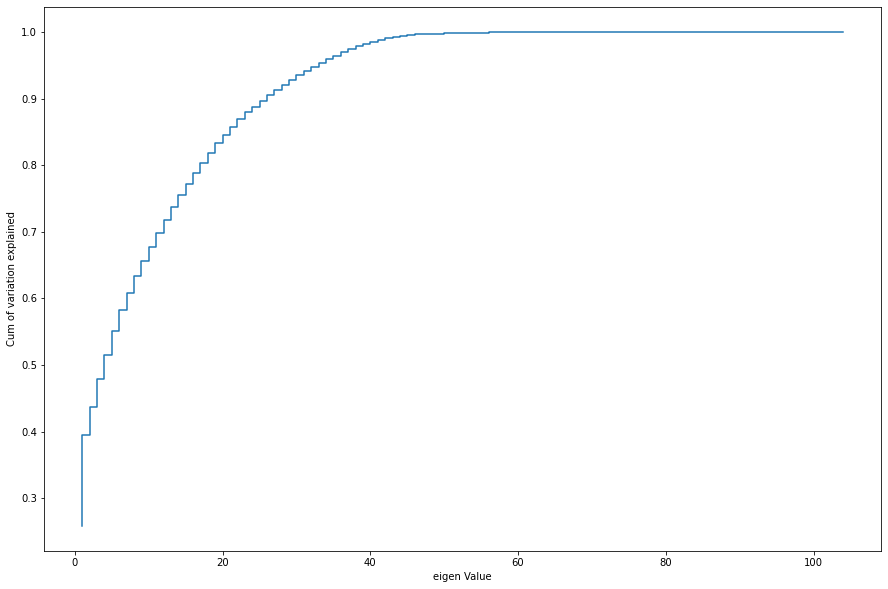

In [43]:
'PLOT - CUMULATIVE VARIATON EXPLAINED vs EIGEN VALUE'
cum_val=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15,10));
plt.step(range(1,105),cum_val);
plt.ylabel('Cum of variation explained');
plt.xlabel('eigen Value');
plt.show();

* No. of components =46 give us nearly 99% explained variance in data

In [44]:
pca=PCA(n_components=46)
pca.fit(x_train)

PCA(n_components=46)

In [45]:
x_trainp=pca.transform(x_train)
x_testp=pca.transform(x_test)

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5,6]}
grid = GridSearchCV(dTree, param_grid,cv=10)
%time grid.fit(x_trainp, y_train)
print(grid.best_params_)
dTreebest = grid.best_estimator_
y_predict_Grid = dTreebest.predict(x_testp)

CPU times: user 2min 44s, sys: 1.11 s, total: 2min 45s
Wall time: 2min 46s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [47]:
dTreebest.score(x_trainp,y_train)
dTreebest.score(x_testp,y_test)

0.9617137648131268

0.7959183673469388

#### We have reduced the no. of dimensions from 105 to 46. Here, the performance of the model has taken a little dip.

## Step 5.1.6 : Display and explain the classification report in detail

In [48]:
print(classification_report(y_test, y_predict_Grid, digits=2))

              precision    recall  f1-score   support

          -1       0.93      0.84      0.89       366
           1       0.06      0.15      0.09        26

    accuracy                           0.80       392
   macro avg       0.50      0.50      0.49       392
weighted avg       0.88      0.80      0.83       392



In [49]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
Accu_score=accuracy_score(y_test,y_predict_Grid)*100
recall=(recall_score(y_test,y_predict_Grid)*100)
precision=(precision_score(y_test,y_predict_Grid)*100)
f1score=f1_score(y_test,y_predict_Grid)*100

In [50]:
print("Accuracy of Decision Tree is %0.3f"%Accu_score)
print("Misclassification Rate of Decision Tree Model is %0.3f"%(100- Accu_score))
print("F1-Score of Decision Tree is %0.3f"%f1score)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision)

Accuracy of Decision Tree is 79.592
Misclassification Rate of Decision Tree Model is 20.408
F1-Score of Decision Tree is 9.091
Recall( =TP/(TP+FN)) is 15.385 
Precision( =TP/(TP+FP)) is 6.452


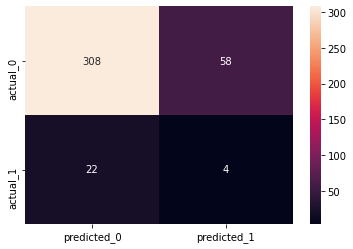

In [51]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_predict_Grid)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [52]:
resultsDf=pd.DataFrame()
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'],'Train Accuracy': dTreebest.score(x_trainp,y_train),'Test Accuracy': Accu_score,'Recall':recall,'Precision':precision,'F1-Score':f1score})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09


* We have created model for semiconductor manufacturing process. Based on various signals collected from sensors, we predict yield type as pass (-1) or fail (+1) for different production entities. 
* Type I error (FP) consitutes those production entities which actually were pass, but we predict them as fail. Such entities, in later stages (Quality control.....) can be corrected as pass.
* Type II error (FN) constitutes those production entities which actually failed, but we predict them as pass. This is what the manufacturing process wants to minimize. 
* Hence, Recall is the most important metric for this model which we will try to maximize.
* Recall is more important here, than Precision as well.
* Hence, Recall at 27% is low. Precision (Out of all predicted failed entity, how much were we able to identify), is also very less. F1 score ,which is the combination of Recall and Precision, is also very less.

## Step 5.1.7 : Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies. 

* We have only been given one sample population on which we are creating the model. Moreover, we do not have any statistics on population (population mean, standard dev etc) to verify if the given sample is a good representation of the population. 
* So, the only way we have is to generate new samples from the given sample population using bootstrapping. We will keep the size of new samples the same as size of original data. 
* We will calculating Model Accuracies on all samples, and based on Central Limit Theorem, we can tell the range of train-test accuracies of the population within a confidence Interval range. 

In [53]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
values=data.values

In [176]:
# configure bootstrap
n_iterations = 50             # Number of bootstrap samples to create
n_size = int(len(data))    # picking all of the given data in every bootstrap sample

# run bootstrap
train_stats=list()
stats = list()
for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    
    predictions = model.predict(test[:,:-1])
    train_score=model.score(train[:,:-1], train[:,-1])
    test_score = accuracy_score(test[:,-1], predictions)    

    train_stats.append(train_score)
    stats.append(test_score)

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

### Training Accuracy

In [193]:
np.unique(train_stats)

array([1.])

#### Training accuracy for all samples is 100%

### Plotting Testing Accuracy

(array([ 1.,  2.,  2.,  1., 11.,  8.,  5.,  7., 10.,  3.]),
 array([0.84, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88, 0.89, 0.89]),
 <a list of 10 Patch objects>)

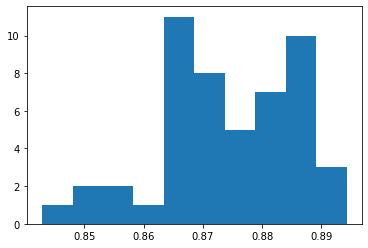

95.0 confidence interval 84.9% and 89.3%


In [190]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                            
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

* Training Accuracy for all 50 models made from 50 bootstrap samples is 100%.
* The Testing Accuracy for all 50 models made from 50 bootstrap samples lies between 89.3 % and 84.9% in 95% confidence Interval. 
* Training and Testing Accuracy for our model is 100% and 84%.(we consider the original Decision Tree model)
* Our Models Training and Testing Accuracies fall within the given range.
* Hence, we can say that a different sample population will not lead to drastically changed new train and test accuracies.

## Step 5.1.8 : Apply the above steps for all possible models that you have learnt so far

## Model 2 - Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LRmod=LogisticRegression()

In [62]:
LRmod.fit(x_trainp,y_train)
y_pred=LRmod.predict(x_testp)

LogisticRegression()

In [63]:
LRmod.score(x_trainp,y_train)
LRmod.score(x_testp,y_test)

0.7433910665451231

0.6785714285714286

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=77)
results = cross_val_score(LRmod,x, y, cv=kfold)
results

np.mean(abs(results))
results.std()

array([0.87, 0.85, 0.9 , 0.96, 0.99, 0.94, 0.99, 0.93, 0.92, 0.98])

0.9317368936795688

0.04655518445862113

In [65]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix
Accu_score2=accuracy_score(y_test,y_pred)*100
recall2=(recall_score(y_test,y_pred)*100)
precision2=(precision_score(y_test,y_pred)*100)
f1score2=(f1_score(y_test,y_pred)*100)

In [66]:
print("Accuracy of Logistic Regression Model is %0.3f"%Accu_score2)
print("Misclassification Rate of Logistic Regression Model is %0.3f"%(100- Accu_score2))
print("F!-score of Logistic Regression Model is %0.3f"%f1score2)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall2)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision2)

Accuracy of Logistic Regression Model is 67.857
Misclassification Rate of Logistic Regression Model is 32.143
F!-score of Logistic Regression Model is 19.231
Recall( =TP/(TP+FN)) is 57.692 
Precision( =TP/(TP+FP)) is 11.538


In [67]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION')
print(classification_report(y_test, y_pred, digits=2))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
              precision    recall  f1-score   support

          -1       0.96      0.69      0.80       366
           1       0.12      0.58      0.19        26

    accuracy                           0.68       392
   macro avg       0.54      0.63      0.50       392
weighted avg       0.90      0.68      0.76       392



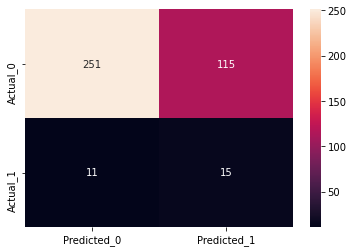

In [68]:
cm=confusion_matrix(y_test, y_pred)

dcm=pd.DataFrame(cm,index=['Actual_0', 'Actual_1'],columns=['Predicted_0', 'Predicted_1',])
sns.heatmap(dcm,annot=True,fmt='.9g');

In [69]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'],'Train Accuracy': LRmod.score(x_trainp,y_train),'Test Accuracy': Accu_score2,'Recall':recall2,'Precision':precision2,'F1-Score':f1score2})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23


#### Logistic Regression has less accuracy than Decision Tree , but there is improvement in Recall.

## Model 3 - KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [71]:
param_grid = {'n_neighbors': [3,5,7,9,11,13,19,21,23,25,27,29],
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(knn, param_grid,cv=10) 
%time grid.fit(x_trainp, y_train)
print(grid.best_params_)
Kbest = grid.best_estimator_
y_predict_Grid = Kbest.predict(x_testp)


CPU times: user 14 s, sys: 51.9 ms, total: 14.1 s
Wall time: 14.1 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 19, 21, 23, 25, 27,
                                         29]})

{'metric': 'euclidean', 'n_neighbors': 3}


In [72]:
Kbest.score(x_trainp,y_train)
Kbest.score(x_testp,y_test)

0.9206927985414768

0.6836734693877551

In [73]:
Accu_score3=accuracy_score(y_test,y_predict_Grid)*100
recall3=(recall_score(y_test,y_predict_Grid)*100)
precision3=(precision_score(y_test,y_predict_Grid)*100)
f1score3=f1_score(y_test,y_predict_Grid)*100

print("Accuracy of KNN is %0.3f"%Accu_score3)
print("Misclassification Rate of KNN Model is %0.3f"%(100- Accu_score3))
print("F1-Score of KNN is %0.3f"%f1score3)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall3)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision3)

Accuracy of KNN is 68.367
Misclassification Rate of KNN Model is 31.633
F1-Score of KNN is 13.889
Recall( =TP/(TP+FN)) is 38.462 
Precision( =TP/(TP+FP)) is 8.475


In [74]:
print('CLASSIFICATION REPORT FOR KNN')
print(classification_report(y_test, y_predict_Grid, digits=2))

CLASSIFICATION REPORT FOR KNN
              precision    recall  f1-score   support

          -1       0.94      0.70      0.81       366
           1       0.08      0.38      0.14        26

    accuracy                           0.68       392
   macro avg       0.51      0.54      0.47       392
weighted avg       0.88      0.68      0.76       392



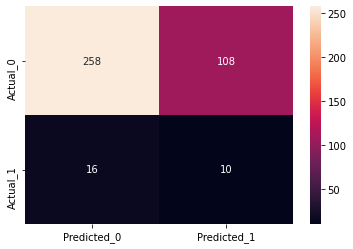

In [75]:
cm=confusion_matrix(y_test, y_predict_Grid)
dcm=pd.DataFrame(cm,index=['Actual_0', 'Actual_1'],columns=['Predicted_0', 'Predicted_1',])
sns.heatmap(dcm,annot=True,fmt='.9g');

In [76]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Train Accuracy': '0.93','Test Accuracy': Accu_score3,'Recall':recall3,'Precision':precision3,'F1-Score':f1score3})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23
2,KNN,0.93,68.37,38.46,8.47,13.89


#### KNN is both accuracy and recall less than Decision Tree and Logistic Regression.

## Model 4 - SVM 

In [77]:
from sklearn.svm import SVC
svm=SVC()

In [78]:
param_grid={ 'C':[0.1,1,10,100],
            'gamma':[0.01,0.1,1,10],
            'kernel':['rbf','poly']
}
grid=GridSearchCV(svm,param_grid,cv=10)  
grid.fit(x_trainp,y_train)
grid.best_params_
SVMbest=grid.best_estimator_
y_predict_grid=SVMbest.predict(x_testp)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'poly']})

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [79]:
SVMbest.score(x_trainp, y_train)
SVMbest.score(x_testp, y_test)

1.0

0.9336734693877551

In [80]:
print(classification_report(y_test, y_predict_grid, digits=2))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



In [81]:
Accu_score4=accuracy_score(y_test,y_predict_grid)*100
recall4=(recall_score(y_test,y_predict_grid)*100)
precision4=(precision_score(y_test,y_predict_grid)*100)
f1score4=f1_score(y_test,y_predict_grid)*100

print("Accuracy of SVM is %0.3f"%Accu_score4)
print("Misclassification Rate of SVM Model is %0.3f"%(100- Accu_score4))
print("F1-Score of SVM is %0.3f"%f1score4)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall4)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision4)

Accuracy of SVM is 93.367
Misclassification Rate of SVM Model is 6.633
F1-Score of SVM is 0.000
Recall( =TP/(TP+FN)) is 0.000 
Precision( =TP/(TP+FP)) is 0.000


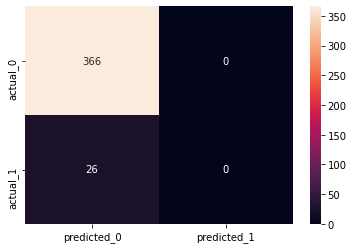

In [82]:
conf_mat = confusion_matrix(y_test, y_predict_grid)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [83]:
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Train Accuracy': '1.0','Test Accuracy': Accu_score4,'Recall':recall4,'Precision':precision4,'F1-Score':f1score4})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23
2,KNN,0.93,68.37,38.46,8.47,13.89
3,SVM,1.0,93.37,0.00,0.00,0.00


* SVM is  not able to predict any datapoint as 'Fail', consequently giving zero recall and precision. Although its accuracy is high, which can be misleading. 

## Model 5 - Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(n_estimators = 50, random_state=12)
rfc = rfc.fit(x_trainp, y_train)

y_predict = rfc.predict(x_testp)

In [86]:
rfc.score(x_trainp , y_train)
rfc.score(x_testp , y_test)

1.0

0.9362244897959183

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=77)
results = cross_val_score(rfc,x, y, cv=kfold)
results

np.mean(abs(results))
results.std()

array([0.88, 0.85, 0.9 , 0.96, 0.99, 0.94, 0.99, 0.94, 0.92, 0.98])

0.9336518046709129

0.04488101124860987

In [88]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
Accu_score5=accuracy_score(y_test,y_predict)*100
recall5=(recall_score(y_test,y_predict)*100)
precision5=(precision_score(y_test,y_predict)*100)
f1score5=f1_score(y_test,y_predict)*100

print("Accuracy of Random Forest Classifier  is %0.3f"%Accu_score5)
print("Misclassification Rate of Random Forest Classifier Model is %0.3f"%(100- Accu_score5))
print("F1-Score of SVM is %0.3f"%f1score5)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall5)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision5)

Accuracy of Random Forest Classifier  is 93.622
Misclassification Rate of Random Forest Classifier Model is 6.378
F1-Score of SVM is 13.793
Recall( =TP/(TP+FN)) is 7.692 
Precision( =TP/(TP+FP)) is 66.667


In [89]:
confusion_matrix(y_test, y_predict)


array([[365,   1],
       [ 24,   2]])

<Figure size 504x360 with 0 Axes>

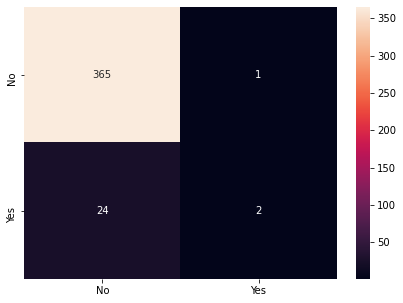

In [90]:
cm=confusion_matrix(y_test, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [91]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'Train Accuracy': '1.0','Test Accuracy': Accu_score5,'Recall':recall5,'Precision':precision5,'F1-Score':f1score5})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23
2,KNN,0.93,68.37,38.46,8.47,13.89
3,SVM,1.0,93.37,0.00,0.00,0.00
4,Random Forest Classifier,1.0,93.62,7.69,66.67,13.79


Random Forest Classifier, like SVM, is also able to predicvery few datapoint as 'Fail', consequently giving very less recall and precision. Although its accuracy is high, which can be misleading. 

## Model 6: Adaboost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=40, random_state=1)

abc = abc.fit(x_trainp, y_train)

In [93]:
y_predict = abc.predict(x_testp)

In [94]:
abc.score(x_trainp , y_train)
abc.score(x_testp , y_test)

0.8992707383773929

0.8163265306122449

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=77)
results = cross_val_score(abc,x, y, cv=kfold)
results

np.mean(abs(results))
results.std()

array([0.82, 0.75, 0.89, 0.94, 0.99, 0.92, 0.99, 0.92, 0.92, 0.97])

0.9094316511513962

0.07053926570176336

In [96]:
Accu_score6=accuracy_score(y_test,y_predict)*100
recall6=(recall_score(y_test,y_predict)*100)
precision6=(precision_score(y_test,y_predict)*100)
f1score6=f1_score(y_test,y_predict)*100

print("Accuracy of Adaboost Classifier  is %0.3f"%Accu_score6)
print("Misclassification Rate of Adaboost Classifier Model is %0.3f"%(100- Accu_score6))
print("F1-Score of SVM is %0.3f"%f1score6)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall6)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision6)

Accuracy of Adaboost Classifier  is 81.633
Misclassification Rate of Adaboost Classifier Model is 18.367
F1-Score of SVM is 14.286
Recall( =TP/(TP+FN)) is 23.077 
Precision( =TP/(TP+FP)) is 10.345


<Figure size 504x360 with 0 Axes>

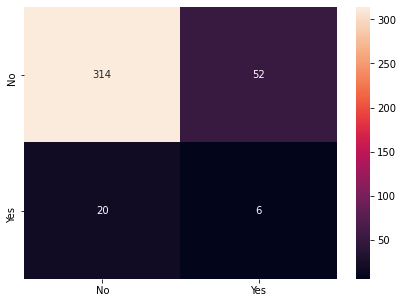

In [97]:
cm=confusion_matrix(y_test, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [98]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost Classifier'], 'Train Accuracy': '0.89','Test Accuracy': Accu_score6,'Recall':recall6,'Precision':precision6,'F1-Score':f1score6})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23
2,KNN,0.93,68.37,38.46,8.47,13.89
3,SVM,1.0,93.37,0.00,0.00,0.00
4,Random Forest Classifier,1.0,93.62,7.69,66.67,13.79
5,Adaboost Classifier,0.89,81.63,23.08,10.34,14.29


Adaboost classifier is also giving low Recall and Precision than expected.

## Model 7: Stacking Classifier

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
# Step 1 - Define base learners

estimators = [
    ('dTreebest', DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth=3, min_samples_leaf=1,min_samples_split=2)),
    ('LRmod', LogisticRegression(solver='liblinear')),
    ('knn', KNeighborsClassifier(metric='euclidean',n_neighbors=3)),
    #('svm', SVC(C=10,gamma=10,kernel= 'rbf')),
    #('rfc' ,RandomForestClassifier(n_estimators = 50, random_state=12)),
    ('abc', AdaBoostClassifier(n_estimators=40, random_state=1))]

In [101]:
# step 2 - Defining meta model & stacking
stack = StackingClassifier(estimators=estimators, 
                           final_estimator=LogisticRegression())
                           #final_estimator=SVC(C=10,gamma=10,kernel= 'rbf'))

In [102]:
stack.fit(x_trainp, y_train)

y_predict = stack.predict(x_testp)

StackingClassifier(estimators=[('dTreebest',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=0)),
                               ('LRmod',
                                LogisticRegression(solver='liblinear')),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3)),
                               ('abc',
                                AdaBoostClassifier(n_estimators=40,
                                                   random_state=1))],
                   final_estimator=LogisticRegression())

In [103]:
stack.score(x_trainp, y_train)
stack.score(x_testp, y_test)

0.995897903372835

0.7882653061224489

In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=77)
results = cross_val_score(stack,x, y, cv=kfold)
results

np.mean(abs(results))
results.std()

array([0.87, 0.85, 0.91, 0.96, 0.99, 0.94, 0.99, 0.94, 0.92, 0.98])

0.9336518046709129

0.04533072653114823

In [105]:
print(classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

          -1       0.94      0.83      0.88       366
           1       0.09      0.23      0.13        26

    accuracy                           0.79       392
   macro avg       0.51      0.53      0.50       392
weighted avg       0.88      0.79      0.83       392



In [106]:
Accu_score7=accuracy_score(y_test,y_predict)*100
recall7=(recall_score(y_test,y_predict)*100)
precision7=(precision_score(y_test,y_predict)*100)
f1score7=f1_score(y_test,y_predict)*100

print("Accuracy of Stacking Classifier  is %0.3f"%Accu_score7)
print("Misclassification Rate of Stacking Classifier Model is %0.3f"%(100- Accu_score7))
print("F1-Score of SVM is %0.3f"%f1score7)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall7)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision7)

Accuracy of Stacking Classifier  is 78.827
Misclassification Rate of Stacking Classifier Model is 21.173
F1-Score of SVM is 12.632
Recall( =TP/(TP+FN)) is 23.077 
Precision( =TP/(TP+FP)) is 8.696


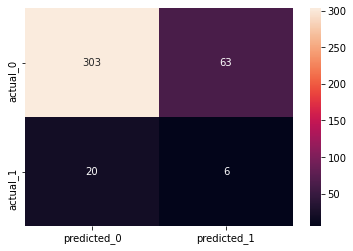

In [107]:
conf_mat = confusion_matrix(y_test, y_predict)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Meta Classifier'],'Train Accuracy': '0.99','Test Accuracy': Accu_score7,'Recall':recall7,'Precision':precision7,'F1-Score':f1score7})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23
2,KNN,0.93,68.37,38.46,8.47,13.89
3,SVM,1.0,93.37,0.00,0.00,0.00
4,Random Forest Classifier,1.0,93.62,7.69,66.67,13.79
5,Adaboost Classifier,0.89,81.63,23.08,10.34,14.29
6,Meta Classifier,0.99,78.83,23.08,8.70,12.63


# Step 5.2 : Display and compare all the models designed with their train and test accuracies

In [109]:
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,79.59,15.38,6.45,9.09
1,Logistic Regression,0.74,67.86,57.69,11.54,19.23
2,KNN,0.93,68.37,38.46,8.47,13.89
3,SVM,1.0,93.37,0.00,0.00,0.00
4,Random Forest Classifier,1.0,93.62,7.69,66.67,13.79
5,Adaboost Classifier,0.89,81.63,23.08,10.34,14.29
6,Meta Classifier,0.99,78.83,23.08,8.70,12.63


* Train accuracies of all models is very good, except Logistic regression which has train accuracy at 73% only.
* Test Accuracy of most models is low, ranging from 60% - 70%.
* Moslty all models are showing high variance. Hence they will be overfit models.
* But Recall of most models is low.(Except some models like Logistic Regression, Random Forest classifier) 
* Precision is also very low for all models. Consequently F1-score is also very low.
* Type I error (FP) for this model will consitute those production entities which actually were pass, but we predict them as fail. Such entities, in later stages (Quality control.....) can be corrected as pass.
* Type II error (FN) constitutes those production entities which actually failed, but we predict them as pass. This is what the manufacturing process wants to minimize. 
* Hence, Recall is the most important metric for this model which we will try to maximize.
* We see that few models like logistic regression, Random Forest classifier have fairly high recall.

 # Step 5.3 : Select the final best trained model along with your detailed comments for selecting this model. 

* No one model emerges as a properly fit model with acceptable Accuracy scores and Recall values.
* We can compromise on precision (Out of all predicted failed entity, how much were we able to identify) because we focus on reducing Type II error (FN) (those production entities which actually failed, but we predict them as pass) rather than Type I error (FP) (those production entities which actually were pass, but we predict them as fail)
* From the given models, we will choose Logistic Regression becuase its Recall is highest(69%) and F1-score is highest.
* Train Test Accuracies for Logistic Regression do not show High variance.Hence,It is a generalizable model which is not overfit on training data. 
* Although Bias of Logistic Regression is high and but given low variance, this is the model we select for future use.

# Creating Pipeline for the model

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [94]:
pipeline = Pipeline([
                    ('scl', StandardScaler()), 
                    ('pca', PCA(n_components=46)),
                    ('clf', LogisticRegression(random_state=1))])

In [95]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=46)),
                ('clf', LogisticRegression(random_state=1))])

In [96]:
y_predict = pipeline.predict(x_test)

In [97]:
pipeline.score(x_train, y_train)
pipeline.score(x_test, y_test)

0.7306289881494986

0.6785714285714286

In [98]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
Accu_score8=accuracy_score(y_test,y_predict)*100
recall8=(recall_score(y_test,y_predict)*100)
precision8=(precision_score(y_test,y_predict)*100)
f1score8=f1_score(y_test,y_predict)*100

print("Accuracy   is %0.3f"%Accu_score8)
print("Misclassification Rate is %0.3f"%(100- Accu_score8))
print("F1-Score is %0.3f"%f1score8)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall8)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision8)

Accuracy   is 67.857
Misclassification Rate is 32.143
F1-Score is 19.231
Recall( =TP/(TP+FN)) is 57.692 
Precision( =TP/(TP+FP)) is 11.538


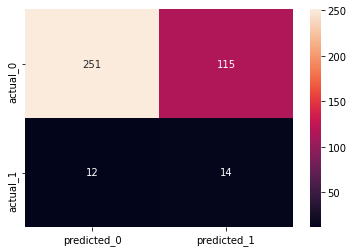

In [93]:
conf_mat = confusion_matrix(y_test, y_predict)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

# Step 5.4 : Pickle the selected model for future use.

We will save pipeline Model with pickle.

In [178]:
import pickle
saved_model = pickle.dumps(pipeline)

In [179]:
# load the model from disk
loaded_model = pickle.loads(saved_model)

# Step 5.6 : • Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.

In [180]:
future=pd.read_excel('Future_predictions.xlsx')

In [181]:
# picking the  columns selected after original Data's EDA.
columns = [int(i) for i in data.columns[:-1]] 
new_df=future[columns]

#filling in missing values
for feature in new_df.columns:
    new_df[feature].fillna(0,inplace=True)    
    new_df[feature].replace(0,new_df[feature].median(),inplace=True)
   
 #Scaling the new data
    from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(new_df)

In [187]:
# Use the loaded pickled model to make predictions 
predict=loaded_model.predict(new_df) 

In [188]:
predict

array([-1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1])

* Above are the predicted values for the given new data set.

# Step 6: Conclusion on the results and improvisation.

* The given Dataset had 1567 rows and 592 columns  wit total 927664 datapoints. Clearly, the dataset suffered from Curse of Dimensionality.
* There were Missing Values, Outliers and  zero/low variance columns in the data and they had to be treated as such.
* It was very important to handle to reduce the dimensions of data without loosing any information. We used various techniques (PCA,Coeffieent of Variation <1, etc) for this.
* We chose Logistic Regression Model out of all 7 models that we built from this data. Logistic regression gave us good recall, although model accuracy is low.
* All Models were mostly either High Bias  or High Variance. This leads us to think wheter the given dataset is a good representation of the population.
* Maybe some information on the sampling techniques used to collect this sample would throw more light on this aspct.